In [1]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, 'Lagrange', 2)

In [3]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

In [9]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f * v * dx

In [10]:
# Compute solution
u = Function(V)


solve(a == L, u, bc)

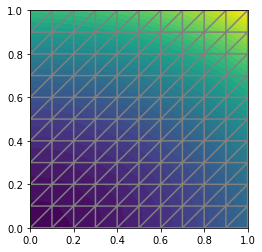

In [11]:
# Plot solution and mesh
plot(u)
plot(mesh)

# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

In [12]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

In [13]:
# Compute maximum error at verticies
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

In [15]:
import numpy as np
error_max = np.max(np.abs(vertex_values_u - vertex_values_u_D))
print('u_exact = ', vertex_values_u_D)
print('u_fem = ', vertex_values_u)

u_exact =  [1.   1.01 1.04 1.09 1.16 1.25 1.36 1.49 1.64 1.81 2.   1.02 1.03 1.06
 1.11 1.18 1.27 1.38 1.51 1.66 1.83 2.02 1.08 1.09 1.12 1.17 1.24 1.33
 1.44 1.57 1.72 1.89 2.08 1.18 1.19 1.22 1.27 1.34 1.43 1.54 1.67 1.82
 1.99 2.18 1.32 1.33 1.36 1.41 1.48 1.57 1.68 1.81 1.96 2.13 2.32 1.5
 1.51 1.54 1.59 1.66 1.75 1.86 1.99 2.14 2.31 2.5  1.72 1.73 1.76 1.81
 1.88 1.97 2.08 2.21 2.36 2.53 2.72 1.98 1.99 2.02 2.07 2.14 2.23 2.34
 2.47 2.62 2.79 2.98 2.28 2.29 2.32 2.37 2.44 2.53 2.64 2.77 2.92 3.09
 3.28 2.62 2.63 2.66 2.71 2.78 2.87 2.98 3.11 3.26 3.43 3.62 3.   3.01
 3.04 3.09 3.16 3.25 3.36 3.49 3.64 3.81 4.  ]
u_fem =  [1.   1.01 1.04 1.09 1.16 1.25 1.36 1.49 1.64 1.81 2.   1.02 1.03 1.06
 1.11 1.18 1.27 1.38 1.51 1.66 1.83 2.02 1.08 1.09 1.12 1.17 1.24 1.33
 1.44 1.57 1.72 1.89 2.08 1.18 1.19 1.22 1.27 1.34 1.43 1.54 1.67 1.82
 1.99 2.18 1.32 1.33 1.36 1.41 1.48 1.57 1.68 1.81 1.96 2.13 2.32 1.5
 1.51 1.54 1.59 1.66 1.75 1.86 1.99 2.14 2.31 2.5  1.72 1.73 1.76 1.81
 1.88 1.97 2

In [17]:
# Print errors
print('error L2 = ', error_L2)
print('error_max = ', error_max)

error L2 =  6.087950103231449e-14
error_max =  1.028066520802895e-13
